## Усков Константин Александрович
### БАСО-03-20
# **Дисциплина «Информационные технологии»**
# **Рабочая тетрадь №3**
>Постановка задачи классификации

>Классификация — один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется обучающей выборкой. Классовая принадлежность остальных объектов не известна. Требуется построить алгоритм, способный классифицировать произвольный объект из исходного множества.

>Классифицировать объект — значит, указать номер (или наименование класса), к которому относится данный объект.

>Классификация объекта — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.
---
## **1.1. Теоретический материал – Функции Python**
---
Перед тем как рассматривать задачи классификации вспомним понятие функции (метода) в Python. Функция в python - объект,
принимающий аргументы и возвращающий значение. Обычно функция определяется с помощью инструкции 'def'.

Определим простейшую функцию:

In [ ]:
def add(x, y):
    return x + y

Инструкция return говорит, что нужно вернуть значение. В нашем случае функция возвращает сумму x и y. Теперь мы ее можем вызвать:

In [ ]:
add(1, 10)

11

In [ ]:
add('abc', 'def')

'abcdef'

Функция может быть любой сложности и возвращать любые объекты (списки, кортежи, и даже функции):

In [ ]:
def newfunc(n):
    def myfunc(x):
        return x + n
    return myfunc
new = newfunc(100) # new - это функция
new(200)

300

Функция может и не заканчиваться инструкцией return, при этом функция вернет значение None:

In [ ]:
def func():
    pass
print(func())

None


Функция может принимать произвольное количество аргументов или не принимать их вовсе. Также распространены функции с произвольным числом аргументов, функции с позиционными и именованными аргументами, обязательными и необязательными.

In [ ]:
def func(*args):
    return args
func(1, 2, 3, 'abc')

(1, 2, 3, 'abc')

In [ ]:
func()

()

In [ ]:
func(1)

(1,)

Как видно из примера, args - это кортеж из всех переданных аргументов функции, и с переменной можно работать также, как и с
кортежем.

Функция может принимать и произвольное число именованных
аргументов, тогда перед именем ставится **:

In [ ]:
def func(**kwargs):
    return kwargs
func(a=1, b=2, c=3)

{'a': 1, 'b': 2, 'c': 3}

In [ ]:
func()

{}

In [ ]:
func(a='python')

{'a': 'python'}

---
## **1.2.1 Пример**
---
### **Задача:**
Напишите функцию sum_range(start, end), которая суммирует все целые числа от значения «start» до величины «end» включительно.

Если пользователь задаст первое число большее чем второе, просто поменяйте их местами.
### **Решение:**

In [ ]:
def sum_range(start, end):
    if start > end:
        end, start = start, end
    return sum(range(start, end + 1))

# Тесты
print(sum_range(2,12))
print(sum_range(-4,4))
print(sum_range(3,2))

77
0
5


---
## **1.2.2 Пример**
---
### **Задача:**
Напишите рекурсивную функцию вычисления факториала на языке Python.
### **Решение:**

In [ ]:
def fact(num):
    if num == 0:
        return 1 # По договореннсти факториал нуля равен единице
    else:
        return num * fact(num - 1)
    # возвращаем результат произведения num и резульата возвращенного функцией fact(num - 1)
print(fact(5))

120


---
## **1.2. Теоретический материал – Расстояние между объектами класса**
---
### **Определение расстояния между объектами класса**

Сходство или различие между объектами классификации устанавливается в зависимости от выбранного метрического расстояния между ними. Если каждый объект описывается n свойствами (признаками), то он может быть представлен как точка в n-мерном пространстве, и сходство с другими объектами будет определяться как соответствующее расстояние. При классификации используются различные меры расстояния между объектами.
1. *Евклидово расстояние*

Это, пожалуй, наиболее часто используемая мера расстояния. Она является геометрическим расстоянием в многомерном пространстве и вычисляется следующим образом:

$P=\sqrt{\sum\limits_{i=1}^N\left( A_i-B_i\right) ^2}$

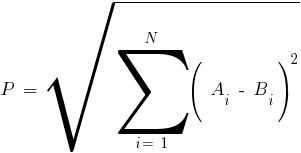

где
- P – расстояние между объектами A и B;
- $A_i$ – значение i-свойства объекта A;
- $B_i$ – значение i-свойства объекта B.\
2. *Квадрат евклидова расстояния*

Данная мера расстояния используется в тех случаях, когда требуется придать больше значение более отдаленным друг от друга объектам. Это
расстояние вычисляется следующим образом:

$P=\sum\limits_{i=1}^N\left( A_i-B_i\right) ^2$

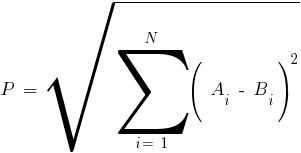

3. *Взвешенное евклидово расстояние*

Применяется в тех случаях, когда каждому i-свойству удается приписать некоторый «вес» wi, пропорционально степени важности признака в задаче классификации:

$P=\sqrt{\sum\limits_{i=1}^N\omega_i \left( A_i-B_i\right) ^2}$

![](https://i.ibb.co/LtNNkJX/image.png)
4. *Хеммингово расстояние*

Также называется манхэттенским, сити-блок расстоянием или расстоянием городских кварталов. Это расстояние является разностью по координатам. Хеммингово расстояние вычисляется по формуле:

$P=\sum\limits_{i=1}^N\left( \left| A_i\right| -\left| B_i\right| \right)$

![](https://i.ibb.co/FXn8fNh/image.png)
5. *Расстояние Чебышева*

Принимает значение наибольшего модуля разности между значениями соответствующих свойств (признаков) объектов:

$P=MAX\left| A_i-B_i\right|$

![](https://i.ibb.co/DVcXxNH/image.png)

Выбор меры расстояния и весов для классифицирующих свойств – очень важный этап, так как от этих процедур зависят состав и количество формируемых классов, а также степень сходства объектов внутри классов.


---
## **1.2.3 Пример**
---
### **Задача:**
Напишите функции в Python, которая вычисляет Евклидово расстояние между двумя массивами NumPy.
### **Решение:**

In [ ]:
import numpy as np
def euclidean_distance(v1, v2):
    return sum((x-y) ** 2 for x, y in zip(v1, v2)) ** 0.5

x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
print(euclidean_distance(x,y))

5.196152422706632


---
## **1.2.4 Пример**
---
### **Задача:**
Напишите 4 функции в Python, которые рассчитывают квадрат Евклидова расстояния, взвешенное евклидово расстояние, Хеммингово расстояние и расстояние Чебышева между двумя массивами NumPy.
### **Решение:**

In [ ]:
def sqr_distance(v1, v2):
    return sum((x-y) ** 2 for x, y in zip(v1, v2))

def weighted_euclidean_distance(v1, v2, w):
    return sum((x-y) ** 2 *s for x, y, s in zip(v1, v2, w)) ** 0.5

def manhattan_distance(v1, v2):
    return sum(abs(x-y) for (x, y) in zip(v1, v2))

def chebyshe_distance(v1, v2):
    return max(abs(x-y) for (x, y) in zip(v1, v2))

x = np.array([0, 0, 0])
y = np.array([3, 3, 3])
w = np.array([0, 0, 1])
print(sqr_distance(x, y))
print(weighted_euclidean_distance(x, y, w))
print(manhattan_distance(x, y))
print(chebyshe_distance(x, y))

27
3.0
9
3


---
## **1.2.5 Пример**
---
### **Задача:**
В Python есть встроенные функции для вычисления расстояний между векторами. Мы будем использовать NumPy для расчета расстояния для двух точек, поскольку ранее рассмотренные структуры данных могут быть переведены в Numpy массив с помошью специальных функциий. Например, для серий это будет выглядеть следующим образом: seriesName.to_numpy().

Для удобства визуализации и анализа результатов в дальнейших расчетах будем использовать 2 точки в 3-х мерном пространстве:
### **Решение:**

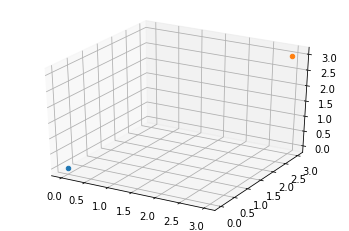

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
plt.show()

---
## **1.2.6 Пример**
---
## **Задача:**
Рассчитать расстояния между двумя точками с использованием методов определения расстояний, представленных выше.
### **Решение:**

In [ ]:
#Расстояние Еклида
print(np.linalg.norm(x-y))
#Квадрат Евклидова расстояния
print(np.linalg.norm(x-y) ** 2)
#Растояние Чебышева
print(np.linalg.norm(x - y, ord = np.inf))
#Расстояние Хемминга
print(np.linalg.norm(x - y, ord=1))

5.196152422706632
27.0
3.0
9.0


---
## **1.3.1 Задание**
---
### **Задача:**
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.
### **Решение:**

x1 =  [8.2438423  0.50791691 4.51594591]
x2 =  [7.32350035 0.61276206 6.97273717]
x3 =  [3.15580218 9.61069354 4.06758627]
x4 =  [7.59937511 0.39743705 0.65890592]
Для точек x1, x2
Расстояние Еклида:  2.6256132789692113
Квадрат Евклидова расстояния 6.893845090699453
Растояние Чебышева 2.456791259205554
Расстояние Хемминга 3.4819783506407047
Для точек x1, x3
Расстояние Еклида:  10.437898298172625
Квадрат Евклидова расстояния 108.94972088299498
Растояние Чебышева 9.102776626926206
Расстояние Хемминга 14.639176380782544
Для точек x1, x4
Расстояние Еклида:  3.912071221392145
Квадрат Евклидова расстояния 15.30430124124463
Растояние Чебышева 3.8570399906226185
Расстояние Хемминга 4.611987034106413
Для точек x2, x3
Расстояние Еклида:  10.333072180824391
Квадрат Евклидова расстояния 106.77238069412695
Растояние Чебышева 8.997931479837005
Расстояние Хемминга 16.070780548552946
Для точек x2, x4
Расстояние Еклида:  6.323522498725749
Квадрат Евклидова расстояния 39.98693679189074
Растояние Чебышев

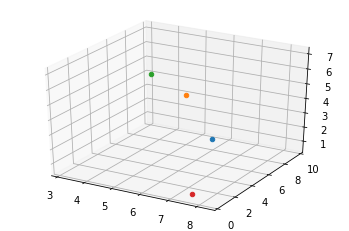

In [ ]:
# C^2_4 = 6...

x1 = numpy.random.random(3) * 10
x2 = numpy.random.random(3) * 10
x3 = numpy.random.random(3) * 10
x4 = numpy.random.random(3) * 10
print('x1 = ', x1)
print('x2 = ', x2)
print('x3 = ', x3)
print('x4 = ', x4)
print("Для точек x1, x2")
print('Расстояние Еклида: ', numpy.linalg.norm(x1-x2))
print('Квадрат Евклидова расстояния', numpy.linalg.norm(x1-x2) ** 2)
print('Растояние Чебышева', numpy.linalg.norm(x1 - x2, ord = numpy.inf))
print('Расстояние Хемминга', numpy.linalg.norm(x1 - x2, ord=1))
print("Для точек x1, x3")
print('Расстояние Еклида: ', numpy.linalg.norm(x1-x3))
print('Квадрат Евклидова расстояния', numpy.linalg.norm(x1-x3) ** 2)
print('Растояние Чебышева', numpy.linalg.norm(x1 - x3, ord = numpy.inf))
print('Расстояние Хемминга', numpy.linalg.norm(x1 - x3, ord=1))
print("Для точек x1, x4")
print('Расстояние Еклида: ', numpy.linalg.norm(x1-x4))
print('Квадрат Евклидова расстояния', numpy.linalg.norm(x1-x4) ** 2)
print('Растояние Чебышева', numpy.linalg.norm(x1 - x4, ord = numpy.inf))
print('Расстояние Хемминга', numpy.linalg.norm(x1 - x4, ord=1))
print("Для точек x2, x3")
print('Расстояние Еклида: ', numpy.linalg.norm(x2-x3))
print('Квадрат Евклидова расстояния', numpy.linalg.norm(x2-x3) ** 2)
print('Растояние Чебышева', numpy.linalg.norm(x2 - x3, ord = numpy.inf))
print('Расстояние Хемминга', numpy.linalg.norm(x2 - x3, ord=1))
print("Для точек x2, x4")
print('Расстояние Еклида: ', numpy.linalg.norm(x2-x4))
print('Квадрат Евклидова расстояния', numpy.linalg.norm(x2-x4) ** 2)
print('Растояние Чебышева', numpy.linalg.norm(x2 - x4, ord = numpy.inf))
print('Расстояние Хемминга', numpy.linalg.norm(x2 - x4, ord=1))
print("Для точек x3, x4")
print('Расстояние Еклида: ', numpy.linalg.norm(x3-x4))
print('Квадрат Евклидова расстояния', numpy.linalg.norm(x3-x4) ** 2)
print('Растояние Чебышева', numpy.linalg.norm(x3 - x4, ord = numpy.inf))
print('Расстояние Хемминга', numpy.linalg.norm(x3 - x4, ord=1))
new = plt.figure().add_subplot(111, projection = '3d')
new.scatter(x1[0], x1[1], x1[2])
new.scatter(x2[0], x2[1], x2[2])
new.scatter(x3[0], x3[1], x3[2])
new.scatter(x4[0], x4[1], x4[2])
plt.show()

---
## **1.3.2 Задание**
---
### **Задача:**
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания
необходимо использовать функцию arange.
### **Решение:**

In [ ]:
Z = np.zeros((5, 5))
Z += np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


---
## **2.1. Теоретический материал – Задачи классификации**
---
### **Решение задачи классификации методом k ближайших соседей**
Метод k-ближайших соседей используется для решения задачи классификации. Он относит объекты к классу, которому принадлежит большинство из k его ближайших соседей в многомерном пространстве признаков. Это один из простейших алгоритмов обучения классификационных моделей. Число k – это количество соседних объектов в пространстве признаков, которые сравниваются с классифицируемым объектом. Иными словами, если k=10, то каждый объект сравнивается с 10-ю соседями. В процессе обучения алгоритм просто запоминает все векторы признаков и соответствующие им метки классов. При работе с реальными данными, т.е. наблюдениями, метки класса которых неизвестны, вычисляется расстояние между вектором нового наблюдения и ранее запомненными. Затем выбирается k ближайших к нему векторов, и новый объект относится к классу, которому принадлежит большинство из них. Приведем алгоритм метода.
1. Выберите значение K соседей (скажем, k = 5)
2. Найдите ближайшую точку данных K (5) для нашей новой точки данных на основе евклидова расстояния (которое мы обсудим позже)
3. Среди этих K точек данных подсчитайте точки данных в каждой категории.
4. Назначьте новую точку данных категории, которая имеет наибольшее количество соседей с новой точкой данных
![](https://i.ibb.co/TwGqMPF/image.png)

Модуль библиотеки sklearn - sklearn.neighbors предоставляет функциональные возможности для контролируемого обучения на основе соседей. Обучение на основе контролируемых соседей бывает двух видов: классификация данных с дискретными метками и регрессия для данных с непрерывными метками. В данном разделе рассмотрим несколько примеров с использованием названного метода.


---
## **2.2.1 Пример**
---
### **Задача:**
В примере показано создание 2d-массива со значениями x и y. Список target содержит возможные выходные классы (часто называемые метками). Далее происходит обучене классификатора k-ближайших соседей по исходным данным. Далее производится прогноз принадлежности к классам для двух точек данных.
### **Решение:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# данные
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

# обучаем модель k-ближайщих соседей к данным
K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print(model)

# делаем прогноз
print( '(-2, -2) is class')
print(model.predict([[-2, -2]]))
print('(1, 3) is class')
print(model.predict([[1, 3]]))


KNeighborsClassifier(n_neighbors=3)
(-2, -2) is class
[0]
(1, 3) is class
[1]


---
## **2.2.2 Пример**
---
### **Задача:**
Далее приведем более наглядный пример. Будет построена граница решения для каждого класса. В качестве данных будем использовать уже знакомый нам и встроенный в библиотеку sklearn набор данных ирисов Фишера. Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. Датасет содержит наблюдения за 150 разными цветками ирисов, данные по каждому цветку расположены в строках. В стобцах записаны длина и ширина чашелистика, длина и ширина лепестка, вид ириса.
### **Решение:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


---
## **2.2.3 Пример**
---
### **Задача:**
Покажем на графиках зависимости ширины лепестка от его длины, а также аналогичный график зависимость для длины и ширины чашелистика. Разные виды цветков отмечены разными цветами.
### **Решение:**

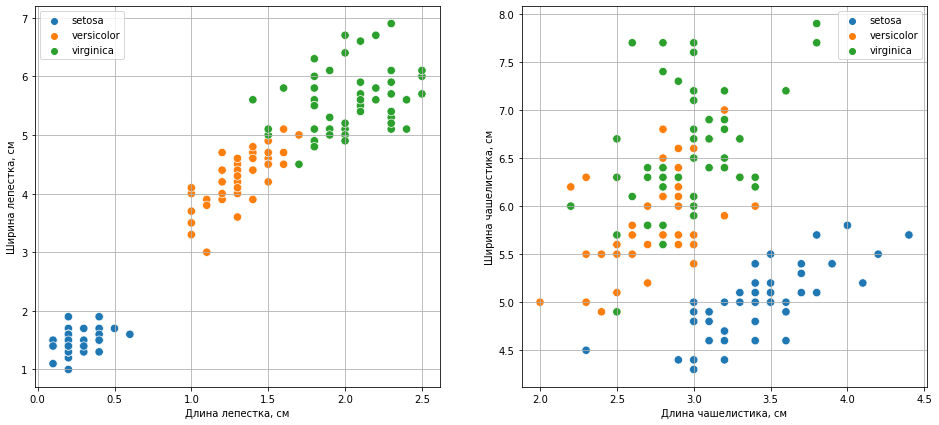

In [ ]:
# Объявляем фигуру из двух графиков и ее размер
plt.figure(figsize = (16, 7))

# Левый график
plt.subplot(121)
sns.scatterplot(
    data = iris, # из этой таблицы нарисовать точки
    x  = 'petal_width', y = 'petal_length', # с этими координатами,
    hue = 'species', # для которых цвет определить согласно этому столбцу
    s = 70 # размер точек
)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend() # добавить легенду
plt.grid() # добавить сетку

# Правый график аналогично
plt.subplot(122)
sns.scatterplot(data = iris, x  = 'sepal_width', y = 'sepal_length', hue = 'species', s = 70)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')
plt.legend()
plt.grid()

---
## **2.2.3 Пример**
---
### **Задача:**
Из графиков видно, что в первом случае классы визуально хорошо отделимы друг от друга, хотя два классе имеют небольшое пересечение. Во втором случае разделить два класса между собой уже намного труднее.

Далее разделим датасет на обучающую и тестовую выборки в соотношении 80:20. Обучающая выборка (training sample) — выборка, по которой производится настройка (оптимизация параметров) модели зависимости. Тестовая (или контрольная) выборка (test sample) — выборка, по которой оценивается качество построенной модели.
### **Решение:**

(120, 4) (30, 4) (120,) (30,)
     sepal_length  sepal_width  petal_length  petal_width
105           7.6          3.0           6.6          2.1
118           7.7          2.6           6.9          2.3
13            4.3          3.0           1.1          0.1
75            6.6          3.0           4.4          1.4
56            6.3          3.3           4.7          1.6
105     virginica
118     virginica
13         setosa
75     versicolor
56     versicolor
Name: species, dtype: object
KNeighborsClassifier(n_neighbors=3)
['versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'setosa' 'setosa' 'virginica']
accuracy: 0.9


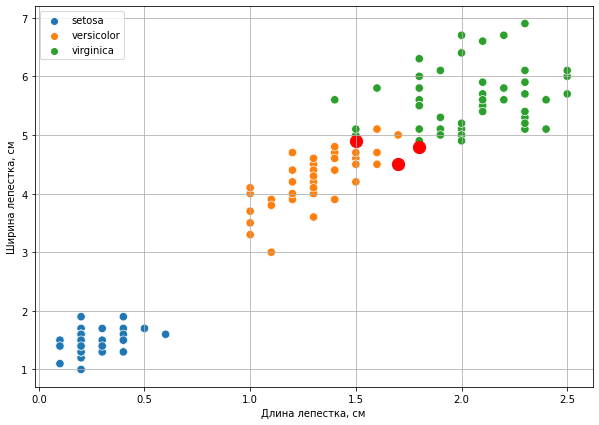

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указывать iloc
    iris.iloc[:, :-1], # берем все колонки кроме последней в признаки
    iris.iloc[:, -1], # последнюю в целевую переменную (класс)
    test_size = 0.20 # размер тестовой выборки 20%
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.head())
print(y_train.head())

# Обучим метод трех ближайших соседей
model = KNeighborsClassifier(n_neighbors = 3)
print(model.fit(X_train, y_train))

# Получим предсказания модели
y_pred = model.predict(X_test)
print(y_pred)

# Покажем на графике, что отражает полученное число.
# Красным цветом обозначены точки, для которых классификация сработала неправильно.
plt.figure(figsize = (10, 7))
sns.scatterplot(x  = 'petal_width', y = 'petal_length', data = iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc = 2)
plt.grid()

# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # то подсвечиваем точку красным цветом
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color = 'red', s = 150)

# качество модели (доля правильно классифицированных точек)
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

---
## **2.3.1 Задание**
---
### **Задача:**
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

### **Решение:**

accuracy: 0.86957
accuracy: 0.91304
accuracy: 0.95652


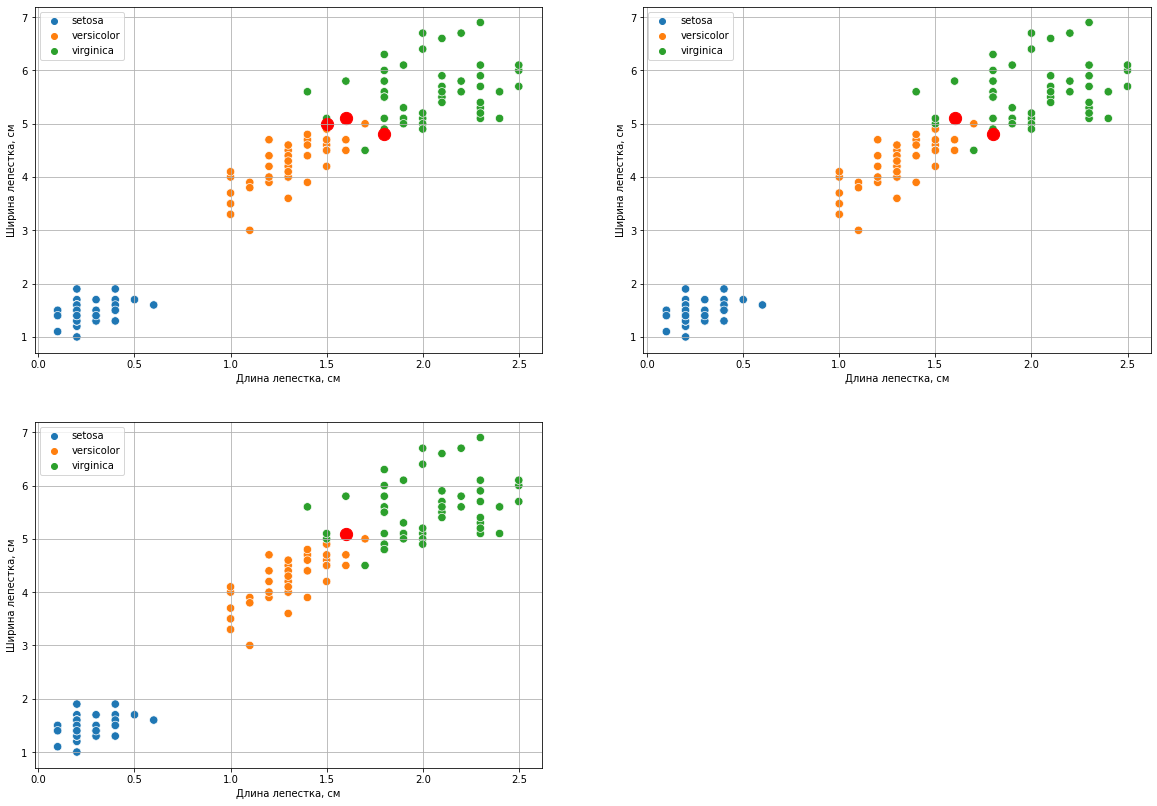

In [ ]:
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size = 0.15)
plt.figure(figsize = (20, 14))
# 1 ближайший сосед
model_1 = KNeighborsClassifier(n_neighbors = 1).fit(X_train_15, y_train_15)
y_pred_1 = model_1.predict(X_test_15)
plt.subplot(221)
sns.scatterplot(x  = 'petal_width', y = 'petal_length', data = iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc = 2)
plt.grid()
for i in range(len(y_test_15)):
    if np.array(y_test_15)[i] != y_pred_1[i]:
        plt.scatter(X_test_15.iloc[i, 3], X_test_15.iloc[i, 2], color = 'red', s = 150)
print(f'accuracy: {accuracy_score(y_test_15, y_pred_1) :.5}')

# 5 ближайших соседей
model_5 = KNeighborsClassifier(n_neighbors = 5).fit(X_train_15, y_train_15)
y_pred_5 = model_5.predict(X_test_15)
plt.subplot(222)
sns.scatterplot(x  = 'petal_width', y = 'petal_length', data = iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc = 2)
plt.grid()
for i in range(len(y_test_15)):
    if np.array(y_test_15)[i] != y_pred_5[i]:
        plt.scatter(X_test_15.iloc[i, 3], X_test_15.iloc[i, 2], color = 'red', s = 150)
print(f'accuracy: {accuracy_score(y_test_15, y_pred_5) :.5}')

# 10 ближайших соседей
model_10 = KNeighborsClassifier(n_neighbors = 10).fit(X_train_15, y_train_15)
y_pred_10 = model_10.predict(X_test_15)
plt.subplot(223)
sns.scatterplot(x  = 'petal_width', y = 'petal_length', data = iris, hue = 'species', s = 70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc = 2)
plt.grid()
for i in range(len(y_test_15)):
    if np.array(y_test_15)[i] != y_pred_10[i]:
        plt.scatter(X_test_15.iloc[i, 3], X_test_15.iloc[i, 2], color = 'red', s = 150)
print(f'accuracy: {accuracy_score(y_test_15, y_pred_10) :.5}')

### Анализ рзультатов задания 2.3.1
После множественного запуска кода, одназначно не могу утвержать об эффективности классификации за счёт увеличения числа ближайших соседей, однако для последнего запуска

![](https://i.ibb.co/Z8hFCN4/image.png)

это верно.


---
## **3.1. Теоретический материал – Работа с категориальными данными**
---
### **Работа с категориальными данными**
Часто бывает полезно разбивать объекты на категории не по количеству, а по качеству. Эта качественная информация нередко представляется как принадлежность наблюдения к отдельной категории, такой как пол, цвета или марка автомобиля. Однако не все категориальные данные одинаковые. Наборы категорий без внутреннего упорядочения называются номинальными. Примеры номинальных категорий включают:
- синий, красный, зеленый;
- мужчина, женщина;
- банан, клубника, яблоко.

С другой стороны, когда набор категорий имеет некое естественное упорядочение, мы называем его порядковым. Например:
- низкий, средний, высокий;
- молодые, старые;
- согласен, нейтрален, не согласен.

Более того, категориальная информация часто представлена в данных в виде вектора или столбца символьных значений (например, "Москва", "Санкт-Петербург", "Казань"). Проблема в том, что большинство машинно- обучающихся алгоритмов требуют ввода числовых значений.

Алгоритм k ближайших соседей предоставляет простой пример. Одним из шагов в алгоритме является вычисление расстояний между наблюдениями — часто с использованием евклидова расстояния. Однако вычисление расстояния, очевидно, невозможно, если значение х, является строковым типом (например, "Москва"). Для того чтобы его можно было ввести в уравнение евклидова расстояния, нам нужно преобразовать это строковое значение в числовой формат. Наша цель — сделать преобразование, которое правильно передает информацию в категориях (упорядоченность, относительные интервалы между категориями и т. д.). Существует большое количество методов кодирования категориальных данных, среди которых нет универсальных. Выбирая метод, стоит отталкиваться от ваших данных, мощности множества категорий и алгоритма машинного обучения.

Далее рассмотрим некоторые методы таких преобразований.

---
## **3.2.1 Пример**
---
### **Задача:**
Дан порядковый категориальный признак (например, высокий, средний, низкий). Выполнить его кодировку.

Для решения задачи можно использовать метод replace фрейма данных pandas для преобразования строковых меток в числовые эквиваленты
### **Решение:**

In [ ]:
# Загрузить библиотеку
import pandas as pd

# Создать признаки
dataframe = pd.DataFrame({"оценка": ["низкая", "низкая", "средняя", "средняя", "высокая"]})
# Создать словарь преобразования шкалы
scale_mapper = {"низкая":1, "средняя":2, "высокая":3}

# Заменить значения признаков значения словаря
print(dataframe["оценка"].replace(scale_mapper))

0    1
1    1
2    2
3    2
4    3
Name: оценка, dtype: int64


---
## **3.2.2 Пример**
---
### **Задача:**
Дан словарь, и требуется его конвертировать в матрицу признаков.

Для решения задачи можно задействовать класс-векторизатор словаря Dictvectorizer:
### **Решение:**

In [1]:
# Импортировать библиотеку
from sklearn.feature_extraction import DictVectorizer
# Создать словарь
data_dict = [{"красный": 2, "синий": 4},
             {"красный": 4, "синий": 3},
             {"красный": 1, "желтый": 2},
             {"красный": 2, "желтый": 2}]
# Создать векторизатор словаря
dictvectorizer = DictVectorizer(sparse = False)
# Конвертировать словарь в матрицу признаков
features = dictvectorizer.fit_transform(data_dict)
features
# вообще-то дан массив словарей

array([[0., 2., 4.],
       [0., 4., 3.],
       [2., 1., 0.],
       [2., 2., 0.]])

---
## **3.3.2 Задание**
---
### **Задача:**
Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.
### **Решение:**

In [ ]:
human_1 = {'возраст': 19, 'вес': 70, 'рост': 1.8, 'скорость шага': 1.39, 'скорость бега': 5.56, 'цвет волос': 'коричнеый', 'национальность': "русский"}
human_2 = {'возраст': 18, 'вес': 75, 'рост': 1.7, 'скорость шага': 1, 'скорость бега': 4.56, 'цвет волос': 'корица', 'национальность': "русский"}
human_3 = {'возраст': 19, 'вес': 75, 'рост': 1.9, 'скорость шага': 1.42, 'скорость бега': 6.6, 'цвет волос': 'золотистый', 'национальность': "украинец"}
humans = [human_1, human_2, human_3]
array_mark = DictVectorizer(sparse = False).fit_transform(humans)
print(array_mark)

[[70.   19.    1.    0.    1.8   5.56  1.39  0.    0.    1.  ]
 [75.   18.    1.    0.    1.7   4.56  1.    0.    1.    0.  ]
 [75.   19.    0.    1.    1.9   6.6   1.42  1.    0.    0.  ]]
